# More Multi Plots Grid
* Continuing from Seaborn01 - Facet Grid.
* Multi plots grid allows mapping of plot types corresponding to rows and columns of a grid. 
* Creation of similar plots separated by features.
* **Pair Grids:** 
    * The pairplot function
    * The PairGrid function
* **Joint Grids**
    * The jointplot function
    * The JointGrid function
* Seaborn API documentation: https://seaborn.pydata.org/api.html
* Seaborn colour palette keywords and list: https://seaborn.pydata.org/tutorial/color_palettes.html
___

In [1]:
# Library Import + Data Load
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ir = sns.load_dataset('iris')
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
ir['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

___
## pairplot()
* Plot pairwise relationships in a dataset.
* The simplest invocation uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal.

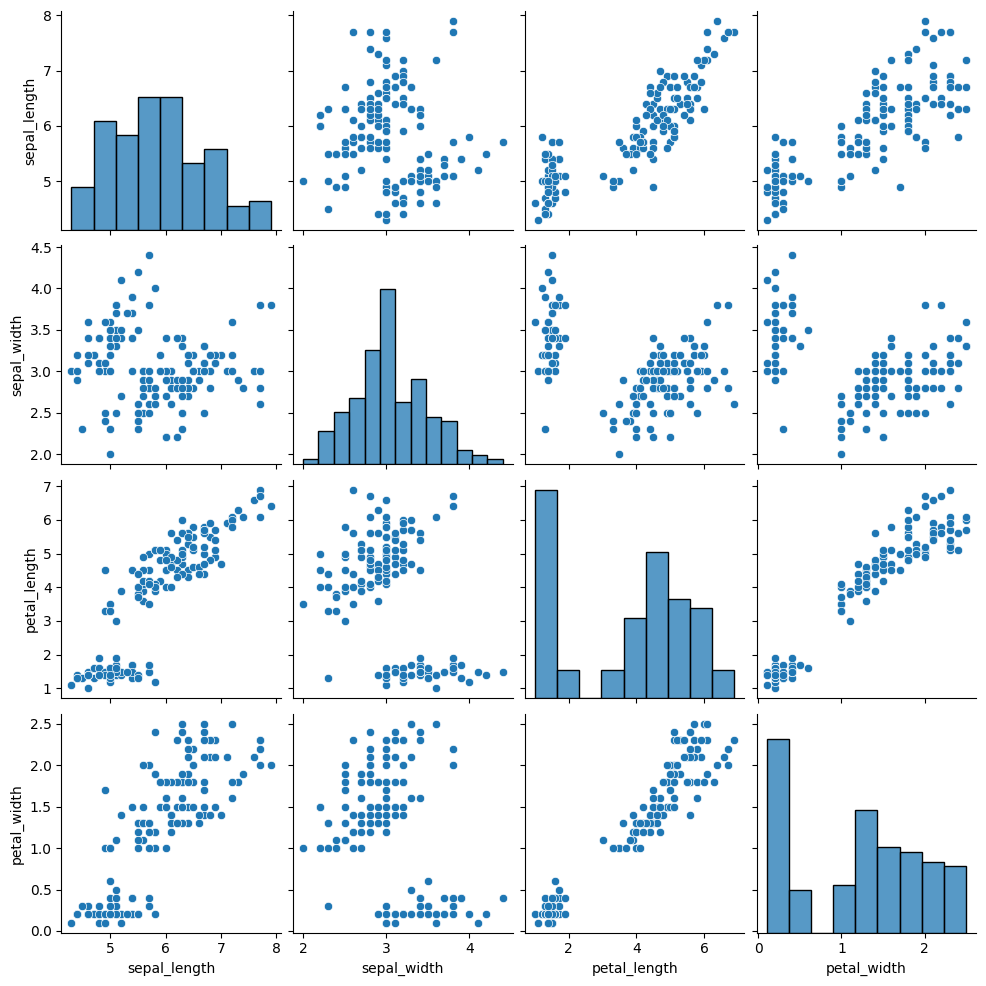

In [5]:
sns.pairplot(ir)

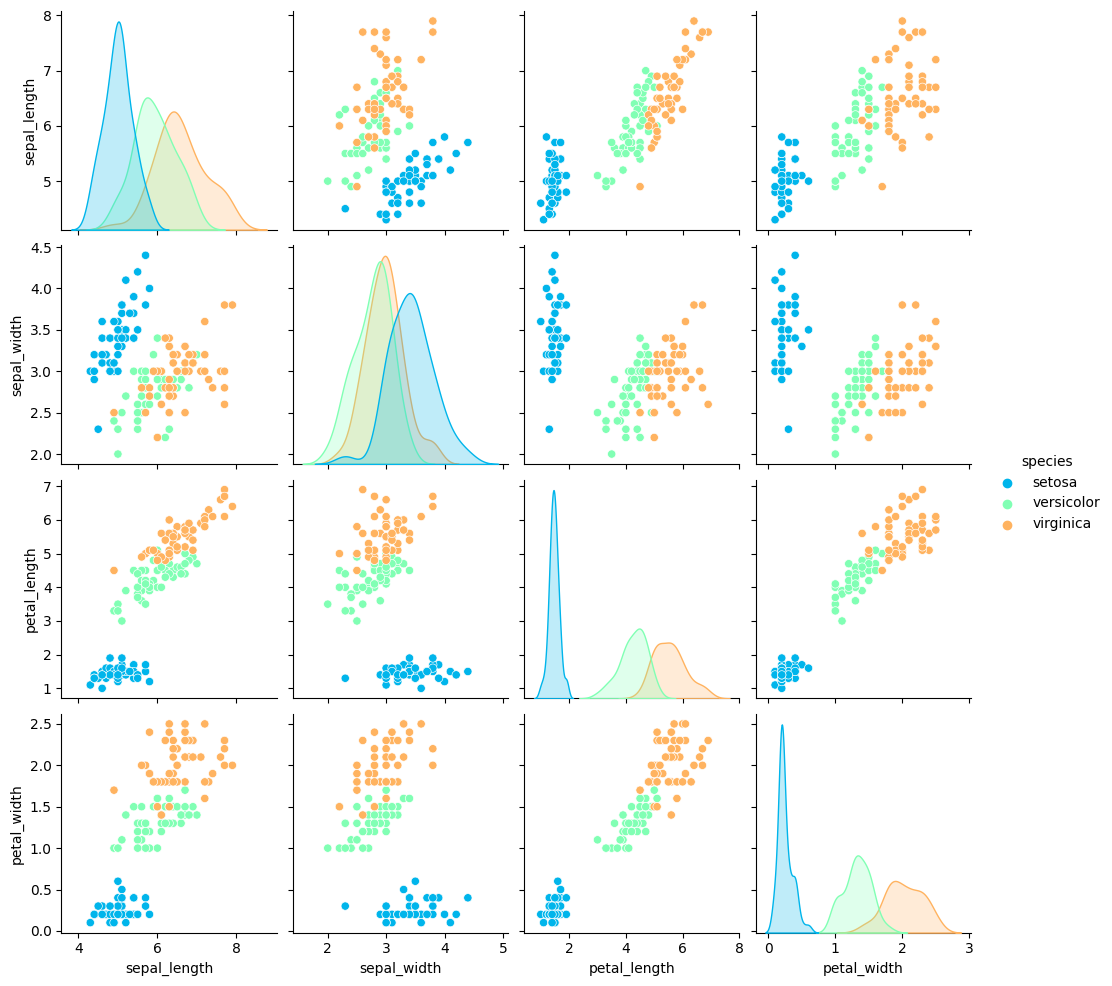

In [16]:
sns.pairplot(ir, hue='species', palette='rainbow')

___
## PairGrid (A more sophisticated version of pairplot)
* Provides a higher degree of control compared to pairplot.
* Subplot grid for plotting pairwise relationships in a dataset.
* Maps each variable in a dataset onto a column and row in a grid of multiple axes.

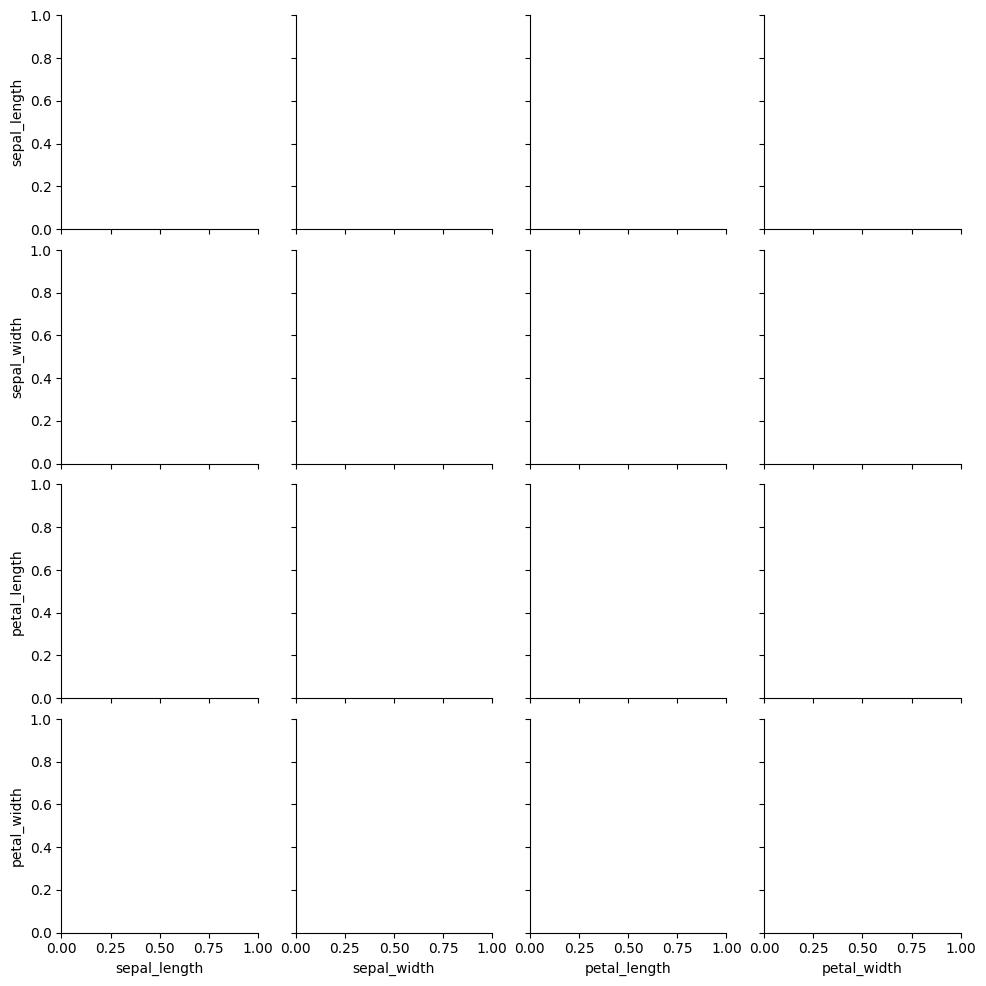

In [3]:
# Setup an empty pair grid framework
sns.PairGrid(ir)

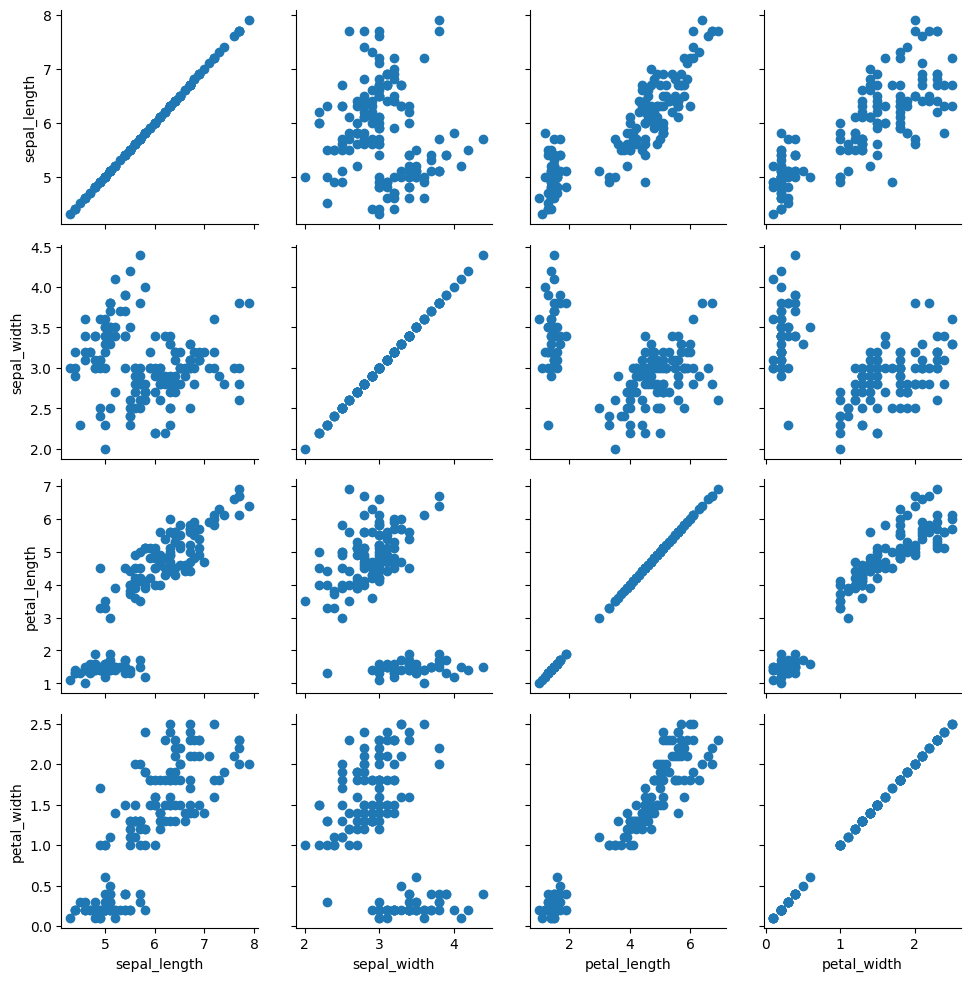

In [7]:
# Data mapping into the grid
pg = sns.PairGrid(ir)
pg.map(plt.scatter)

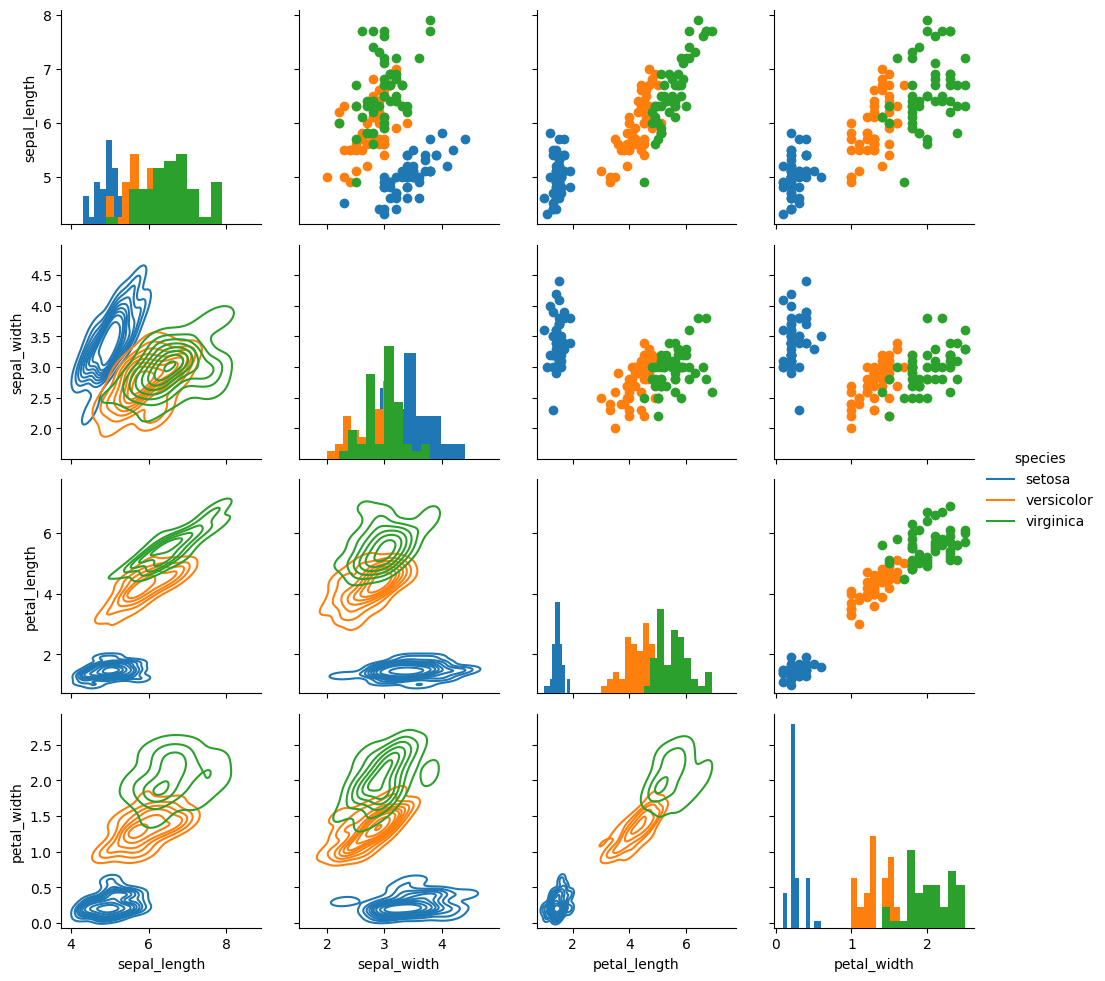

In [14]:
# Map to diagonal, upper, and lower grids.
pg = sns.PairGrid(ir, hue="species")
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot)
pg.add_legend()

___
## jointplot()
* Draw a plot of two variables with bivariate and univariate graphs.
* Provides a convenient interface to the JointGrid class with several canned plot kind.

In [17]:
# Example data load
t = sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


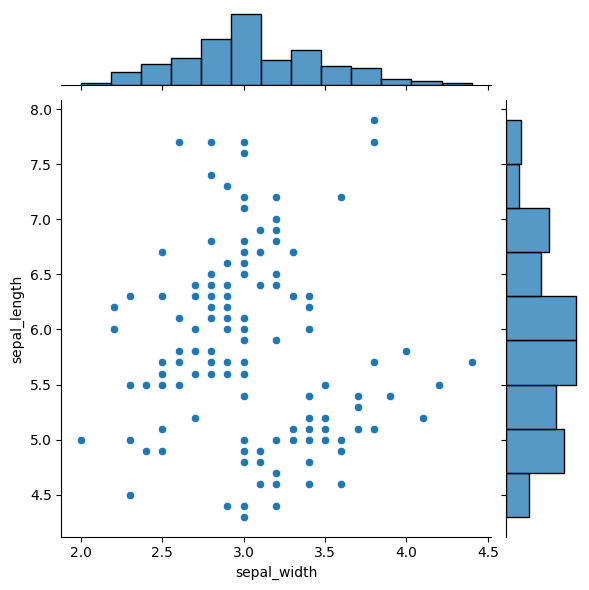

In [18]:
# Example of the simplest invocation, assign x and y to create a scatterplot (using scatterplot()) with marginal histograms (using histplot())
sns.jointplot(data=ir, x="sepal_width", y="sepal_length")

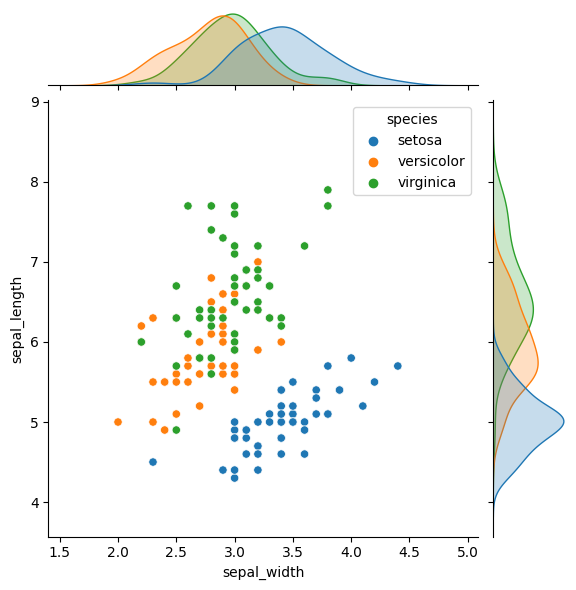

In [19]:
sns.jointplot(data=ir, x="sepal_width", y="sepal_length", hue="species")

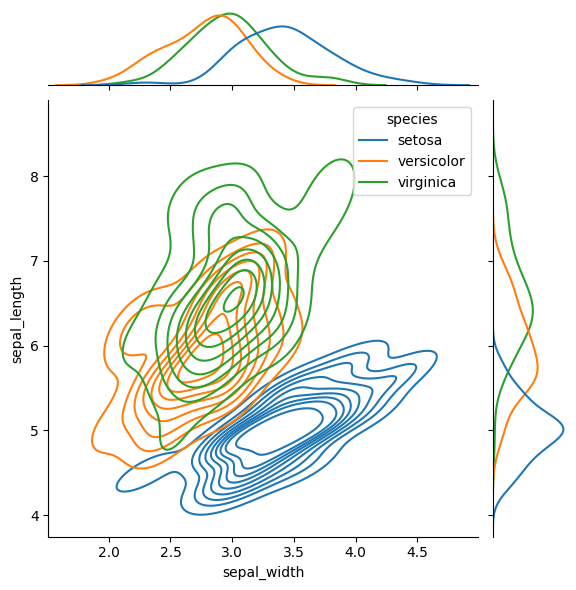

In [20]:
sns.jointplot(data=ir, x="sepal_width", y="sepal_length", hue="species", kind='kde')

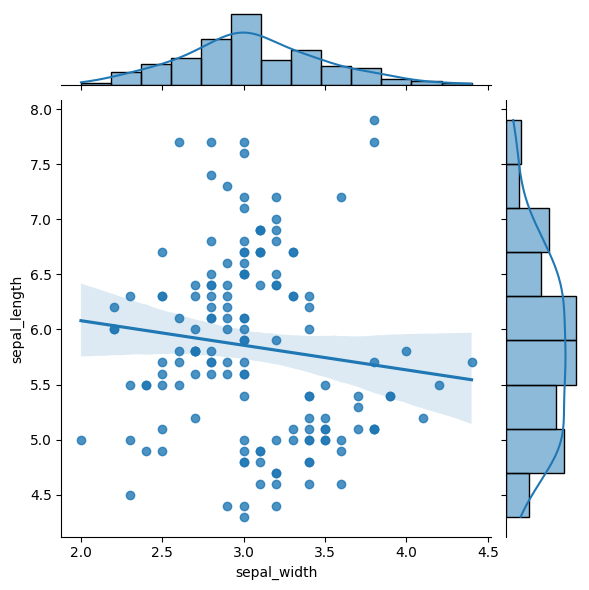

In [22]:
sns.jointplot(data=ir, x="sepal_width", y="sepal_length", kind='reg')

___
## JointGrid (A more sophisticated version of jointplot)
* Provides a higher degree of control compared to jointplot.
* Grid for drawing a bivariate plot with marginal univariate plots.
* Many plots can be drawn by using the figure-level interface jointplot().

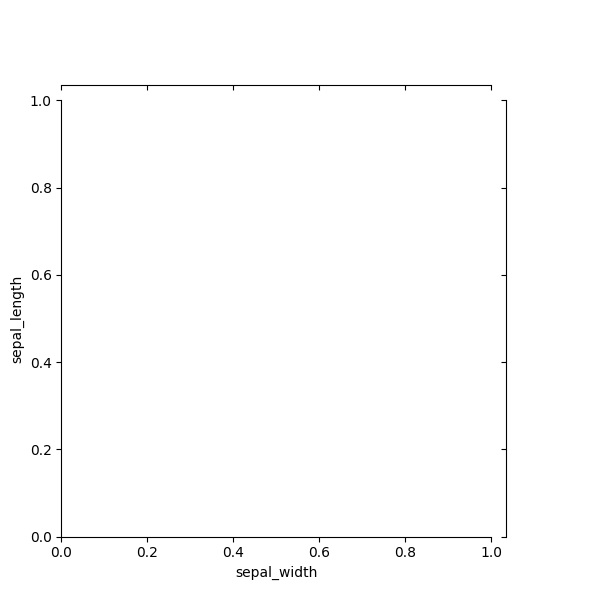

In [28]:
# Setup an empty grid framework
jg = sns.JointGrid(data=ir, x="sepal_width", y="sepal_length")

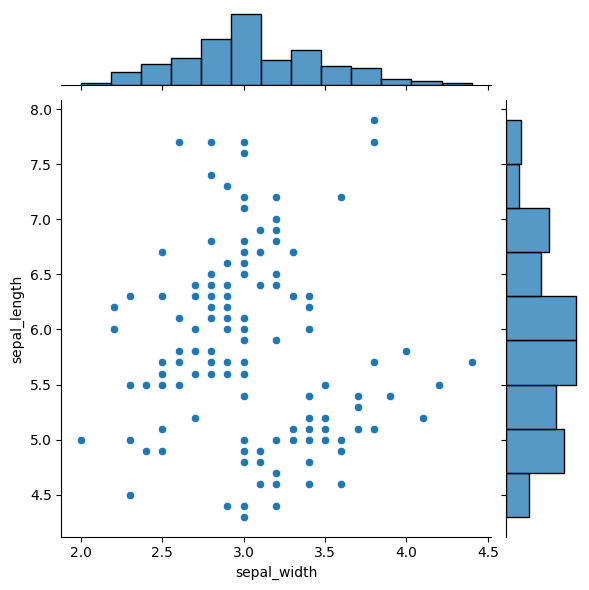

In [29]:
jg = sns.JointGrid(data=ir, x="sepal_width", y="sepal_length")
jg.plot(sns.scatterplot, sns.histplot)

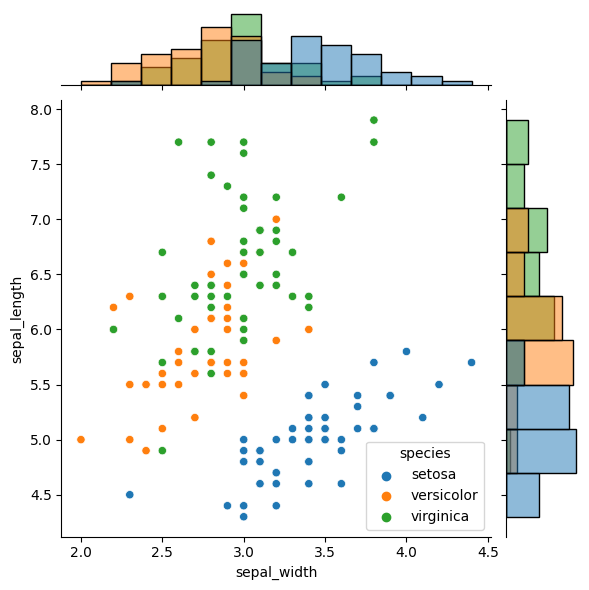

In [30]:
jg = sns.JointGrid(data=ir, x="sepal_width", y="sepal_length", hue='species')
jg.plot(sns.scatterplot, sns.histplot)

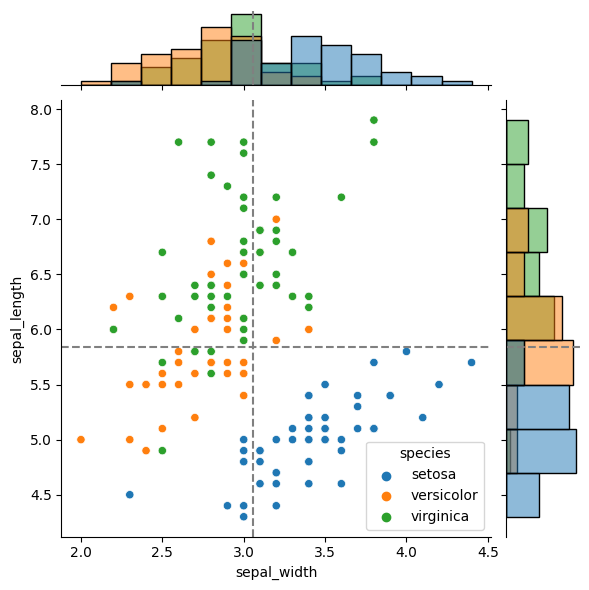

In [34]:
# Shows the average across the three species
jg = sns.JointGrid(data=ir, x="sepal_width", y="sepal_length", hue='species')
jg.plot(sns.scatterplot, sns.histplot)
jg.refline(x=ir["sepal_width"].mean(), y=ir["sepal_length"].mean())

___